# PI_MLops Mauro Ferrera
## Proceso ETL y analisis EDA de los datos  

In [1]:
### Importacion de las librerias a utilizar
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling 

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonoteboo

### Impotacion de los datos (Plataformas de streaming)

In [2]:
data_netflix = pd.read_csv('Csvs\\netflix_titles.csv')
data_disney = pd.read_csv('Csvs\\disney_plus_titles.csv')
data_hulu = pd.read_csv('Csvs\\hulu_titles.csv')
data_amazon = pd.read_csv('Csvs\\amazon_prime_titles.csv')

## Transformacion de los datos (procesos ETL)

In [3]:
###### TRANSFORMACION DE LOS DATOS NETFLIX

data_netflix['Plataforma'] = ['Netflix'] * len(data_netflix) ### Creo la columna plataforma con el nombre de la plataforma correspondiente

data_netflix['show_id'] = 'n' + data_netflix['show_id']  ### Transformacion de id para identificar su plataforma segun su inicial

data_netflix['rating'] = data_netflix['rating'].fillna('G') ### Donde halla valores nulos en rating remplazar con una 'G' simbolizando 'para todo publico'

data_netflix['date_added'] = pd.to_datetime(data_netflix['date_added']) ### Pasamos datos a tipo fecha de la columna 'data_added'

data_netflix['type'] = data_netflix['type'].str.lower() ### Transformamos a texto en minuscula todas las columna tipo texto 
data_netflix['title'] = data_netflix['title'].str.lower()
data_netflix['director'] = data_netflix['director'].str.lower()
data_netflix['cast'] = data_netflix['cast'].str.lower()
data_netflix['country'] = data_netflix['country'].str.lower()
data_netflix['listed_in'] = data_netflix['listed_in'].str.lower()
data_netflix['description'] = data_netflix['description'].str.lower()

data_netflix[['duration_int', 'duration_type']] = data_netflix['duration'].str.split(' ', expand=True) ### Creamos columna 'duration_type' y 'duration_int' en base a la columna 'duration'
data_netflix.drop(columns=['duration'], inplace=True)
data_netflix['duration_int'] = data_netflix['duration_int'].fillna(0).astype(int)
data_netflix['duration_int'] = data_netflix ['duration_int'].astype(int)
 
data_netflix['Plataforma'] = data_netflix['Plataforma'].str.lower()

In [4]:
###### TRANSFORMACION DE LOS DATOS AMAZON

data_amazon['show_id'] = 'a' + data_amazon['show_id']  ### Transformacion de id para identificar su plataforma segun su inicial

data_amazon['rating'] = data_amazon['rating'].fillna('G') ### Donde halla valores nulos en rating remplazar con una 'G' simbolizando 'para todo publico' 

data_amazon['date_added'] = pd.to_datetime(data_amazon['date_added']) # Tranformar tipo de dato a datatime 

data_amazon['type'] = data_amazon['type'].str.lower()
data_amazon['title'] = data_amazon['title'].str.lower()
data_amazon['director'] = data_amazon['director'].str.lower()
data_amazon['cast'] = data_amazon['cast'].str.lower()
data_amazon['country'] = data_amazon['country'].str.lower()
data_amazon['listed_in'] = data_amazon['listed_in'].str.lower()
data_amazon['description'] = data_amazon['description'].str.lower() # Tranformando mayusculas en minusculas 

data_amazon[['duration_int', 'duration_type']] = data_amazon['duration'].str.split(' ', expand=True)
data_amazon.drop(columns=['duration'], inplace=True)#Transformando de columna 'duration' a 'duration_type' y 'duration_int'
data_amazon['duration_int'] = data_amazon['duration_int'].fillna(0).astype(int)
data_amazon['duration_int'] = data_amazon['duration_int'].astype(int)
data_amazon['Plataforma'] = ['Amazon'] * len(data_amazon) ### Creo la columna plataforma con el nombre de la plataforma correspondiente
data_amazon['Plataforma'] = data_amazon['Plataforma'].str.lower()

In [5]:
###TRANSFORMACION DE LOS DATOS Disney

data_disney['show_id'] = 'd' + data_disney['show_id']  #Transformacion de id 

data_disney['rating'] = data_disney['rating'].fillna('G') #Donde haya  filas nullas colocar una G 'apto para todo publico' 

data_disney['date_added'] = pd.to_datetime(data_disney['date_added']) # Tranformar tipo de dato a datatime 

data_disney['type'] = data_disney['type'].str.lower()
data_disney['title'] = data_disney['title'].str.lower()
data_disney['director'] = data_disney['director'].str.lower()
data_disney['cast'] = data_disney['cast'].str.lower()
data_disney['country'] = data_disney['country'].str.lower()
data_disney['listed_in'] = data_disney['listed_in'].str.lower()
data_disney['description'] = data_disney['description'].str.lower() # Tranformando mayusculas en minusculas 

data_disney[['duration_int', 'duration_type']] = data_disney['duration'].str.split(' ', expand=True)
data_disney.drop(columns=['duration'], inplace=True)#Transformando de columna 'duration' a 'duration_type' y 'duration_int'
data_disney['duration_int'] = data_disney['duration_int'].fillna(0).astype(int)
data_disney['duration_int'] = data_disney['duration_int'].astype(int)
data_disney['Plataforma'] = ['Disney'] * len(data_disney)
data_disney['Plataforma'] = data_disney['Plataforma'].str.lower()

In [6]:
###TRANSFORMACION DE LOS DATOS Hulu

data_hulu['show_id'] = 'h' + data_hulu['show_id']  #Transformacion de id 

data_hulu['rating'] = data_hulu['rating'].fillna('G') #Donde haya  filas nullas colocar una G 'apto para todo publico' 

data_hulu['date_added'] = pd.to_datetime(data_hulu['date_added']) # Tranformar tipo de dato a datatime 

data_hulu['type'] = data_hulu['type'].str.lower()
data_hulu['title'] = data_hulu['title'].str.lower()
data_hulu['director'] = data_hulu['director'].str.lower()
data_hulu['cast'] = data_hulu['cast'].fillna('').astype(str)
data_hulu['cast'] = data_hulu['cast'].astype(str)
data_hulu['cast'] = data_hulu['cast'].str.lower()
data_hulu['country'] = data_hulu['country'].str.lower()
data_hulu['listed_in'] = data_hulu['listed_in'].str.lower()
data_hulu['description'] = data_hulu['description'].str.lower() # Tranformando mayusculas en minusculas 

data_hulu[['duration_int', 'duration_type']] = data_hulu['duration'].str.split(' ', expand=True)
data_hulu.drop(columns=['duration'], inplace=True)#Transformando de columna 'duration' a 'duration_type' y 'duration_int'
data_hulu['duration_int'] = data_hulu['duration_int'].fillna(0).astype(int)
data_hulu['duration_int'] = data_hulu ['duration_int'].astype(int)
data_hulu['Plataforma'] = ['Hulu'] * len(data_hulu)
data_hulu['Plataforma'] = data_hulu['Plataforma'].str.lower()

In [7]:
###Concatenacion de los datasets
df_concat = pd.concat([data_netflix, data_hulu, data_amazon, data_disney], axis=0)

In [8]:
#Importacion de los 8 csv
df1 = pd.read_csv('Csvs\\1.csv')
df2 = pd.read_csv('Csvs\\2.csv')
df3 = pd.read_csv('Csvs\\3.csv')
df4 = pd.read_csv('Csvs\\4.csv')
df5 = pd.read_csv('Csvs\\5.csv')
df6 = pd.read_csv('Csvs\\6.csv')
df7 = pd.read_csv('Csvs\\7.csv')
df8 = pd.read_csv('Csvs\\8.csv')
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8], axis=0)

In [9]:
df.head()

,userId,rating,timestamp,movieId
0,1,1.0,1425941529,as680
1,1,4.5,1425942435,ns2186
2,1,5.0,1425941523,hs2381
3,1,5.0,1425941546,ns3663
4,1,5.0,1425941556,as9500


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11024289 entries, 0 to 1499999
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   rating     float64
 2   timestamp  int64  
 3   movieId    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 420.5+ MB


In [11]:
#cambio el formato de la columna 'timestamp', aca lo paso de int a 'float'
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s').dt.strftime('%B %d, %Y')

In [12]:
#paso a formato fecha 
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [13]:
#Cambiamos el nombre del campo 'rating' por 'score'
df_rating = df.rename(columns = {'rating' : 'score'})

In [14]:
df_rating.head()

,userId,score,timestamp,movieId
0,1,1.0,2015-03-09,as680
1,1,4.5,2015-03-09,ns2186
2,1,5.0,2015-03-09,hs2381
3,1,5.0,2015-03-09,ns3663
4,1,5.0,2015-03-09,as9500


In [15]:
df_rating.shape

(11024289, 4)

In [16]:
#Calculo el promedio de cada pelicula 
MeanScore = df_rating.groupby("movieId")
MeanScore = MeanScore["score"].mean()

In [17]:
#Lo pasamos a un dataframe y reseteamos el indice
df_MeanScore= pd.DataFrame(MeanScore)
df_MeanScore

,score
movieId,
as1,3.467131
as10,3.439571
as100,3.609302
as1000,3.556701
as1001,3.585288
...,...
ns995,3.515625
ns996,3.626518
ns997,3.530526


In [18]:
df_MeanScore.to_csv('scores.csv') #Exportamos el csv

In [19]:
#Concatenamos los scores con sus plataformas segun el id correspondiente
platform_movies = df_concat.merge(df_MeanScore, left_on="show_id", right_on="movieId")

In [20]:
platform_movies.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,Plataforma,duration_int,duration_type,score
0,ns1,movie,dick johnson is dead,kirsten johnson,NaN,united states,2021-09-25,2020,PG-13,documentaries,"as her father nears the end of his life, filmm...",netflix,90,min,3.611111
1,ns2,tv show,blood & water,NaN,"ama qamata, khosi ngema, gail mabalane, thaban...",south africa,2021-09-24,2021,TV-MA,"international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t...",netflix,2,Seasons,3.552632
2,ns3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",NaN,2021-09-24,2021,TV-MA,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...,netflix,1,Season,3.597938


In [21]:
platform_movies.shape

(22998, 15)

In [22]:
platform_movies.isnull().sum()

show_id              0
type                 0
title                0
director          8259
cast              2248
country          11499
date_added        9554
release_year         0
rating               0
listed_in            0
description          4
Plataforma           0
duration_int         0
duration_type      482
score                0
dtype: int64

In [23]:
platform_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22998 entries, 0 to 22997
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        22998 non-null  object        
 1   type           22998 non-null  object        
 2   title          22998 non-null  object        
 3   director       14739 non-null  object        
 4   cast           20750 non-null  object        
 5   country        11499 non-null  object        
 6   date_added     13444 non-null  datetime64[ns]
 7   release_year   22998 non-null  int64         
 8   rating         22998 non-null  object        
 9   listed_in      22998 non-null  object        
 10  description    22994 non-null  object        
 11  Plataforma     22998 non-null  object        
 12  duration_int   22998 non-null  int32         
 13  duration_type  22516 non-null  object        
 14  score          22998 non-null  float64       
dtypes: datetime64[ns](1

In [24]:
#Exportamos las plataformas concatenadas y sus scores
platform_movies.to_csv('platform_movies_scores.csv')

## Analisis exploratorio de los datos EDA

In [25]:
#Descripcion estadistica de los datos numericos
platform_movies.describe()

,release_year,duration_int,score
count,22998.000000,22998.000000,22998.000000
mean,2010.811244,65.710584,3.533443
std,15.401142,51.760868,0.048564
min,1920.000000,0.000000,3.336478
25%,2010.000000,3.000000,3.500000
50%,2016.000000,83.000000,3.533673
75%,2019.000000,101.000000,3.567000
max,2021.000000,601.000000,3.724512


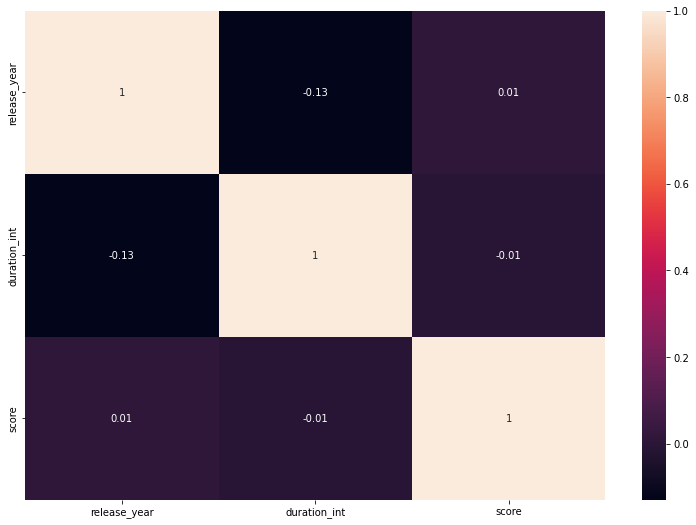

In [26]:
###Vemos la correlacion del datasets con un mapa de calor
df_corr = platform_movies.corr().round(2)
plt.figure(figsize=(13,9))
sns.heatmap(data=df_corr, annot= True)
plt.show()


In [27]:
###Hacemos un profiling de los datos 
report = platform_movies.profile_report(title='Pandas profiling report ')
report.to_file(output_file="report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 33.94it/s]


In [28]:
#Vemos anomalias en los datos
plt.rcParams['figure.figsize'] = (16.0, 6.0)

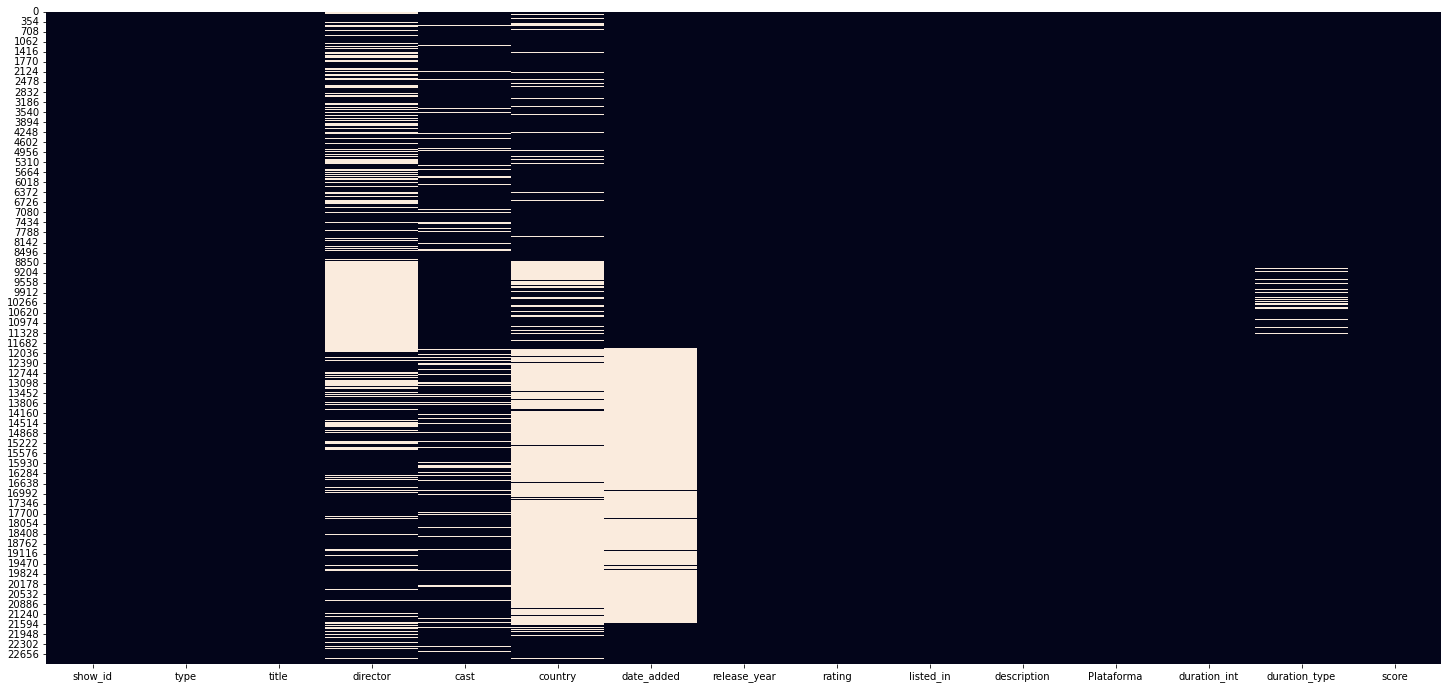

In [29]:
#Visualizamos los valores nulos con una matrix
plt.figure(figsize= (25,12))
sns.heatmap(platform_movies.isnull(), cbar=False)
plt.show()

In [30]:
platform_movies.isnull().sum()

show_id              0
type                 0
title                0
director          8259
cast              2248
country          11499
date_added        9554
release_year         0
rating               0
listed_in            0
description          4
Plataforma           0
duration_int         0
duration_type      482
score                0
dtype: int64